In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import f1_score,confusion_matrix,make_scorer,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [25]:
data=pd.read_csv('E:/Ramya/brushUps/Basics/ML using sklearn/Projects/Wine_quality/data/winequality-red.csv',delimiter=';')
X=data.iloc[:,0:11]
y=data.iloc[:,11]

In [26]:
col_names=X.columns
scaler=preprocessing.MinMaxScaler()
normalized_list=scaler.fit_transform(X)
X_data=pd.DataFrame(normalized_list,columns=col_names)

In [27]:
y=pd.cut(y,bins=3,labels=['poor','normal','excellent'])

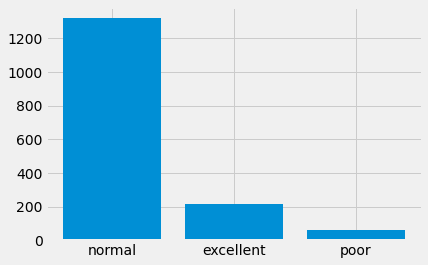

In [28]:
class_range=y.value_counts()
plt.style.use('fivethirtyeight')
plt.bar(list(class_range.index),list(class_range.values))
plt.show()

In [29]:
label_map={'poor':0,'normal':1,'excellent':2}
y=y.map(label_map)
y=np.array(y)

In [30]:
f1=make_scorer(f1_score,average='weighted')

In [31]:
solver_options=['newton-cg','lbfgs', 'sag', 'saga']
c=[100,10,1.0,0.1,0.01]
grid_params={'solver':solver_options,'C':c}
clf=GridSearchCV(LogisticRegression(multi_class='ovr',penalty='l2',class_weight='balanced'),param_grid=grid_params,cv=10,return_train_score=False,scoring=f1)
clf.fit(X_data,y)

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ramya\A

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          multi_class='ovr'),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring=make_scorer(f1_score, average=weighted))

In [32]:
df_lreg=pd.DataFrame(clf.cv_results_)

In [33]:
df_lreg.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_solver', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [34]:
df_lreg=df_lreg[['param_C','param_solver','mean_test_score']]

In [35]:
df_lreg.sort_values(by='mean_test_score',ascending=False)

,param_C,param_solver,mean_test_score
14,0.1,sag,0.718924
12,0.1,newton-cg,0.718340
13,0.1,lbfgs,0.718340
15,0.1,saga,0.718090
8,1.0,newton-cg,0.709246
9,1.0,lbfgs,0.709246
4,10,newton-cg,0.703296
5,10,lbfgs,0.703296
19,0.01,saga,0.703083
18,0.01,sag,0.703083


In [36]:
clf.best_params_

{'C': 0.1, 'solver': 'sag'}

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X_data,y,test_size=0.2,random_state=42)

In [39]:
logreg=LogisticRegression(solver=clf.best_params_['solver'],C=clf.best_params_['C'],multi_class='ovr',penalty='l2',class_weight='balanced')

In [40]:
logreg.fit(X_train,y_train)   
y_pred=logreg.predict(X_test) 
score=f1_score(y_test,y_pred,average='weighted')
cm=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['predicted_poor','predicted_normal','predicted_excellent'],index=['true_poor','true_normal','true_excellent'])

In [41]:
score

0.7489384483602545

In [42]:
cm

,predicted_poor,predicted_normal,predicted_excellent
true_poor,5,5,1
true_normal,25,183,54
true_excellent,4,4,39


<AxesSubplot:>

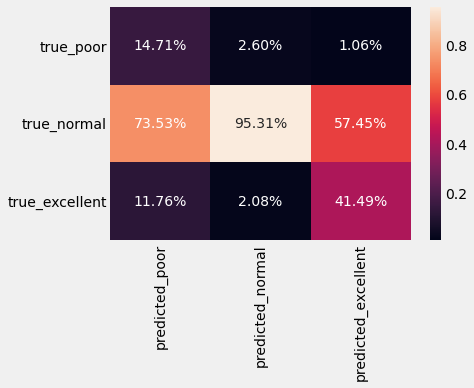

In [43]:
import seaborn as sns
cm_percent=cm/np.sum(cm)
mask=cm_percent.isnull()
sns.heatmap(cm_percent,mask=mask,annot=True,fmt='.2%')